In [1]:
import pandas as pd
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/Users/admin/miniconda3/miniconda3/envs/ml/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
!ls archive

test.csv  train.csv


In [3]:
def getPath(path):
    BASE_PATH = "archive/"
    return BASE_PATH + path

In [4]:
orig_data = pd.read_csv(getPath("train.csv"))
data = orig_data

In [5]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
def min_max_scaling(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def reverse_min_max_scaling(scaled_value, min_value, max_value):
    return (scaled_value * (max_value - min_value)) + min_value

### Analyzing Data

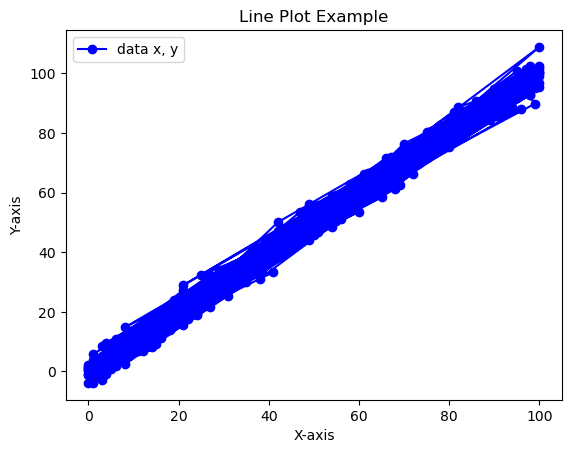

In [23]:
# Create a line plot
plt.plot(data.x, data.y, label='data x, y', color='blue', marker='o')

# Add title and labels
plt.title('Line Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Feature Engineering

In [10]:
# scaling
# data.x = np.log10(data.x)

data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [8]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


### Splitting the dataset

In [9]:
X = data.drop(columns=['selling_price'])
y = data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['selling_price'] not found in axis"

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

### Train Model

In [ ]:
#### TODO: Test everyting below


# # Predict the target variable (y) using the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

### Evaluate

In [ ]:
def evaluate():
    # global y_test
    y_pred = model.predict(X_test)
    y_test_local = y_test.to_numpy()
    
    # reverse min-max sclaing
    y_pred = reverse_min_max_scaling(y_pred, orig_data.selling_price.min(), orig_data.selling_price.max())
    y_test_local = reverse_min_max_scaling(y_test_local, orig_data.selling_price.min(), orig_data.selling_price.max())
    
    df = pd.DataFrame({ 'y_pred': y_pred, 'y_test': y_test_local, 'diff': y_pred - y_test_local  })
    
    mse = mean_squared_error(y_test_local, y_pred)
    r2 = r2_score(y_test_local, y_pred)
    
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print(df)

evaluate()

In [ ]:
def test():
    value = 42
    scaled = min_max_scaling(value, 100, 200)
    rev_scaled = reverse_min_max_scaling(scaled, 100, 200)
    print("scaled", scaled)
    print("rev_scaled", rev_scaled)
test()

### Draw Useful Charts

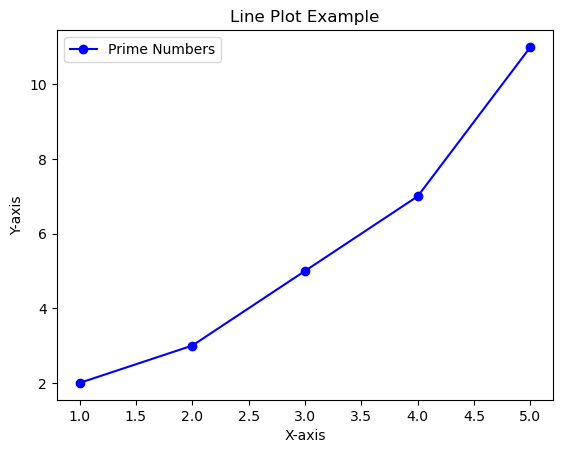

In [17]:
# Test

import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a line plot
plt.plot(x, y, label='Prime Numbers', color='blue', marker='o')

# Add title and labels
plt.title('Line Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()


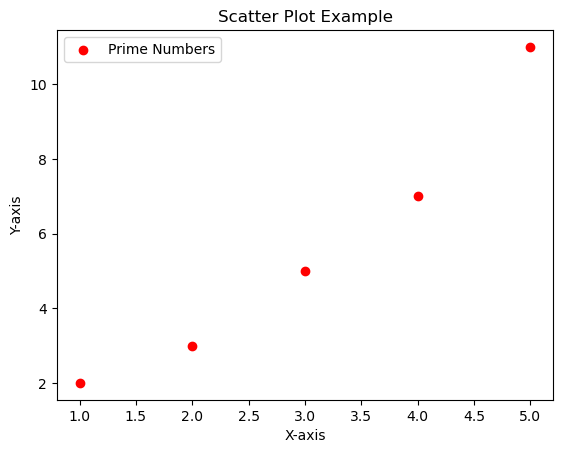

In [13]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a scatter plot
plt.scatter(x, y, label='Prime Numbers', color='red')

# Add title and labels
plt.title('Scatter Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()


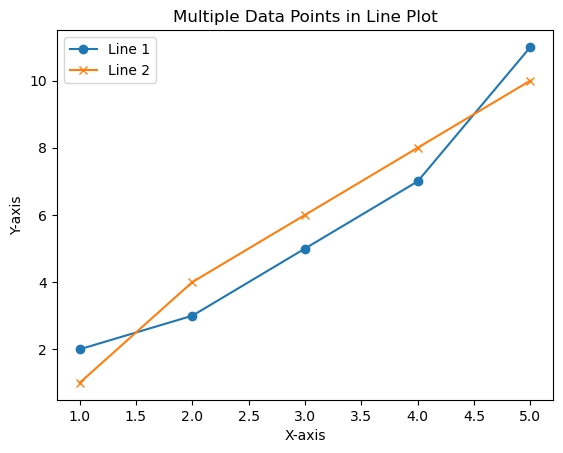

In [24]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [2, 3, 5, 7, 11]
y2 = [1, 4, 6, 8, 10]

# Create a new figure
plt.figure()

# Plot the first set of data points
plt.plot(x, y1, label='Line 1', marker='o')

# Plot the second set of data points
plt.plot(x, y2, label='Line 2', marker='x')

# Add title and labels
plt.title('Multiple Data Points in Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Display the plot
plt.show()
